In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 150

train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')
submission = pd.read_csv('../sample_submission.csv')

cctvCount = pd.read_csv('../cctvCount.csv')
securityCount = pd.read_csv('../securityCount.csv')
childCount = pd.read_csv('../childCount.csv')
parkingCount = pd.read_csv('../parkingCount.csv')

In [ ]:
train = train[train['ECLO'] <= 10]

In [ ]:
train.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


In [ ]:
test.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [ ]:
train['요일'] = train['요일'].replace(['월요일', '화요일', '수요일', '목요일', '금요일'], '평일')
test['요일'] = test['요일'].replace(['월요일', '화요일', '수요일', '목요일', '금요일'], '평일')

In [ ]:
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train[['연', '월', '일', '시간']] = train['사고일시'].str.extract(time_pattern)
train[['연', '월', '일', '시간']] = train[['연', '월', '일', '시간']].apply(pd.to_numeric)
train = train.drop(columns=['사고일시'])

test[['연', '월', '일', '시간']] = test['사고일시'].str.extract(time_pattern)
test[['연', '월', '일', '시간']] = test[['연', '월', '일', '시간']].apply(pd.to_numeric)
test = test.drop(columns=['사고일시'])

In [ ]:
location_pattern = r'(\S+) (\S+) (\S+)'

train[['도시', '구', '동']] = train['시군구'].str.extract(location_pattern)
train = train.drop(columns=['시군구'])

test[['도시', '구', '동']] = test['시군구'].str.extract(location_pattern)
test = test.drop(columns=['시군구'])

In [ ]:
# road_pattern = r'(.+) - (.+)'

# train[['도로형태1', '도로형태2']] = train['도로형태'].str.extract(road_pattern)
# train = train.drop(columns=['도로형태'])

# test[['도로형태1', '도로형태2']] = test['도로형태'].str.extract(road_pattern)
# test = test.drop(columns=['도로형태'])

In [ ]:
most_frequent_accidents = train.groupby('동')['사고유형 - 세부분류'].agg(lambda x: x.value_counts().idxmax())
test = test.merge(most_frequent_accidents, how = 'left', on = '동')

In [ ]:
most_frequent_violation = train.groupby('동')['법규위반'].agg(lambda x: x.value_counts().idxmax())
test = test.merge(most_frequent_violation, how = 'left', on = '동')

In [ ]:
train.head()

,ID,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동
0,ACCIDENT_00000,평일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동
1,ACCIDENT_00001,평일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동
2,ACCIDENT_00002,평일,맑음,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1,대구광역시,수성구,두산동
3,ACCIDENT_00003,평일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2,대구광역시,북구,복현동
4,ACCIDENT_00004,평일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4,대구광역시,동구,신암동


In [ ]:
cctvCount['동'] = cctvCount['시군구']
cctvCount = cctvCount.drop(columns = ['시군구'])
securityCount['동'] = securityCount['시군구']
securityCount = securityCount.drop(columns = ['시군구'])
childCount['동'] = childCount['시군구']
childCount = childCount.drop(columns = ['시군구'])
parkingCount['동'] = parkingCount['시군구']
parkingCount = parkingCount.drop(columns = ['시군구'])


In [ ]:
def outlierRemove(df):
  q3 = df.quantile(0.75)
  q1 = df.quantile(0.25)

  iqr = q3 - q1
  outlier = q3 + 1.5 * iqr
  df[df>outlier] = df.median()

outlierRemove(cctvCount['n_cctv'])
outlierRemove(securityCount['n_security'])
outlierRemove(childCount['n_child'])
outlierRemove(parkingCount['n_parking'])

In [ ]:
train = train.merge(cctvCount, how= 'left', on ='동')
train = train.merge(securityCount, how= 'left', on ='동')
train = train.merge(childCount, how= 'left', on ='동')
train = train.merge(parkingCount, how= 'left', on ='동')

test = test.merge(cctvCount, how= 'left', on ='동')
test = test.merge(securityCount, how= 'left', on ='동')
test = test.merge(childCount, how= 'left', on ='동')
test = test.merge(parkingCount, how= 'left', on ='동')

In [ ]:
test.shape

(10963, 19)

In [ ]:
train['n_cctv'].fillna(3, inplace=True)
train['n_security'].fillna(149, inplace=True)
train['n_child'].fillna(5, inplace=True)
train['n_parking'].fillna(3, inplace=True)
test['n_cctv'].fillna(3, inplace=True)
test['n_security'].fillna(149, inplace=True)
test['n_child'].fillna(5, inplace=True)
test['n_parking'].fillna(3, inplace=True)

In [ ]:
train.head()

,ID,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동,n_cctv,n_security,n_child,n_parking
0,ACCIDENT_00000,평일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동,5.0,391.0,2.0,11.0
1,ACCIDENT_00001,평일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동,12.0,941.0,5.0,4.0
2,ACCIDENT_00002,평일,맑음,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1,대구광역시,수성구,두산동,4.0,473.0,5.0,3.0
3,ACCIDENT_00003,평일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2,대구광역시,북구,복현동,10.0,534.0,11.0,3.0
4,ACCIDENT_00004,평일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4,대구광역시,동구,신암동,12.0,150.0,5.0,1.0


In [ ]:
y_train = train['ECLO']

cols = test.columns
X_train = train[cols]
X_test = test

In [ ]:
X_train = X_train.drop(columns=['ID', '도시', '노면상태', '연', '기상상태', '일'])
X_test = X_test.drop(columns=['ID'])

In [ ]:
def add_noise(series, noise_level):
    return series * (1+ noise_level * np.random.randn(len(series)))

def target_encode(trn_series = None,
                 tst_series=None,
                 target=None,
                 min_samples_leaf=1,
                 smoothing=1,
                 noise_level=0):
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
    smoothing = 1/(1+np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    prior = target.mean()
    averages[target.name] = prior * ( 1- smoothing) + averages['mean'] * smoothing
    averages.drop(['mean', 'count'], axis=1, inplace=True)

    ft_trn_series = pd.merge(
                            trn_series.to_frame(trn_series.name),
                            averages.reset_index().rename(columns={'index':target.name, target.name: 'average'}),
                            on=trn_series.name,
                            how='left')['average'].rename(trn_series.name + "_mean").fillna(prior)
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                            averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
                            on=tst_series.name,
                            how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [ ]:
train_encoded, test_encoded = target_encode(X_train['동'],
                                           X_test['동'],
                                           target=train['ECLO'],
                                           min_samples_leaf=100,
                                           smoothing=10,
                                           noise_level=0.01)

In [ ]:
X_train['동'] = train_encoded
X_test['동'] = test_encoded

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
X_train, X_test=X_train.align(X_test,join='inner',axis=1)

In [ ]:
X_train.head()

,월,시간,동,n_cctv,n_security,n_child,n_parking,요일_일요일,요일_토요일,요일_평일,도로형태_교차로 - 교차로부근,도로형태_교차로 - 교차로안,도로형태_교차로 - 교차로횡단보도내,도로형태_기타 - 기타,도로형태_단일로 - 고가도로위,도로형태_단일로 - 교량,도로형태_단일로 - 기타,도로형태_단일로 - 지하차도(도로)내,도로형태_단일로 - 터널,도로형태_미분류 - 미분류,도로형태_주차장 - 주차장,사고유형_차대사람,사고유형_차대차,사고유형_차량단독,구_남구,구_달서구,구_달성군,구_동구,구_북구,구_서구,구_수성구,구_중구,사고유형 - 세부분류_공작물충돌,사고유형 - 세부분류_기타,사고유형 - 세부분류_길가장자리구역통행중,사고유형 - 세부분류_전도전복 - 전도,사고유형 - 세부분류_추돌,사고유형 - 세부분류_측면충돌,사고유형 - 세부분류_횡단중,법규위반_교차로운행방법위반,법규위반_기타,법규위반_신호위반,법규위반_안전거리미확보,법규위반_안전운전불이행
0,1,0,3.886344,5.0,391.0,2.0,11.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,0,4.246848,12.0,941.0,5.0,4.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1,4.117262,4.0,473.0,5.0,3.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,2,3.693765,10.0,534.0,11.0,3.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,4,4.019230,12.0,150.0,5.0,1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train , test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred = lr.predict(X_val)
rmsle_val = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
print('val rmsle :', rmsle_val)

val rmsle : 0.36873186932341834


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

rf = RandomForestRegressor(random_state=42, max_depth = None, max_features = 1, n_estimators = 100)
rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)
rmsle_val = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
print('val rmsle :', rmsle_val)

val rmsle : 0.3840538318753187


In [ ]:
plt.rc('font', family='NanumBarunGothic')

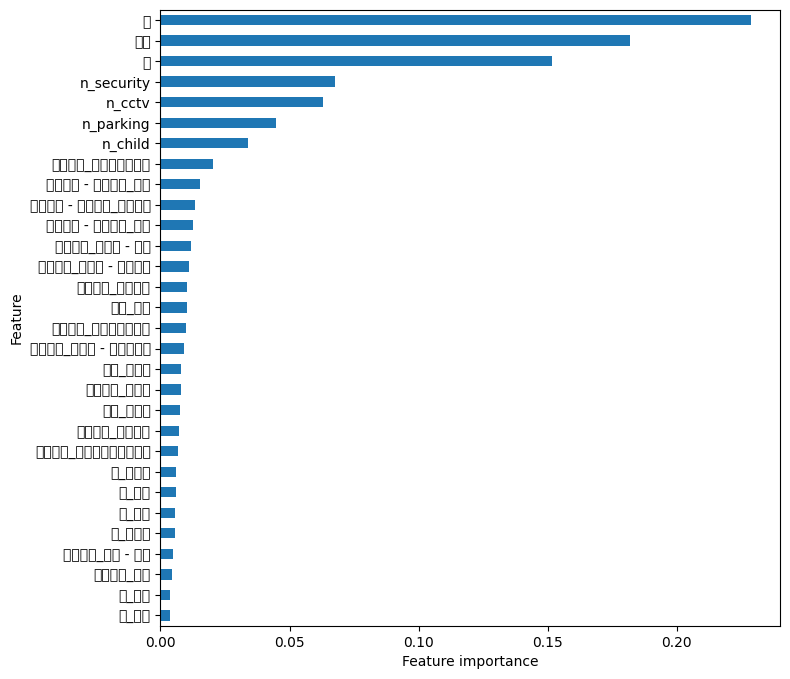

In [ ]:
from pandas import Series

feature_importance = rf.feature_importances_
Series_feat_imp = Series(feature_importance, index=X_test.columns).nlargest(30)
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh(fontsize=10)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# y_pred_rf = rf.predict(X_test)
# y_pred_lgbr = lgbr.predict(X_test)
y_pred_lr = lr.predict(X_test)

In [ ]:
submission.shape

(10963, 2)

In [ ]:
submission['ECLO'] = y_pred_lr

In [ ]:
submission.to_csv('../Submission.csv', index=False)